# Analysis of Results

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
#seismic Station names and coordinates - italian station locations taken from https://terremoti.ingv.it/en/instruments/network/IV
station_list = ["AIO", "CSLB", "HAGA", "MMGO", "MPNC", "MSDA", "MUCR", "SOLUN", "WDD"]
station_lats = [37.9712, 37.94, 37.29, 37.66, 38.15, 35.901233, 38.04, 38.09, 35.837299]
station_lons = [15.233, 14.06, 15.16, 12.98, 15.35, 14.486952, 14.87, 13.53, 14.5242]

In [3]:
results_path = "BASLEINE-error_metrics.csv"
df = pd.read_csv(results_path)

#Filter out sea_mode results since the mode is irrelevant
df = df[df['Target Variable'] != 'sea_mode']

#concatenate the station and target variable since sea_mean sea_mode and sea_median are repeated for different stations, and will make analysis complex
df["Station_Target"] = df["Station"] + "_" + df["Target Variable"]

df

,Station,Target Variable,RF_max_depth,RF_n_estimators,RF_max_features,MAE,MSE,RMSE,R2,Station_Target
0,AIO,"(37.895835876464844, 15.333335876464844)",15,200,40,0.215067,0.095352,0.308791,0.340018,"AIO_(37.895835876464844, 15.333335876464844)"
1,AIO,"(37.9375, 15.375)",15,200,40,0.206335,0.086022,0.293295,0.348148,"AIO_(37.9375, 15.375)"
2,AIO,"(37.895835876464844, 15.375)",15,200,40,0.215909,0.095733,0.309408,0.352851,"AIO_(37.895835876464844, 15.375)"
3,AIO,"(37.85416793823242, 15.333335876464844)",15,200,40,0.218106,0.098620,0.314039,0.341799,"AIO_(37.85416793823242, 15.333335876464844)"
4,AIO,"(37.97916793823242, 15.416667938232422)",15,200,40,0.195274,0.075607,0.274968,0.356817,"AIO_(37.97916793823242, 15.416667938232422)"
...,...,...,...,...,...,...,...,...,...,...
66,WDD,"(35.8125, 14.458335876464844)",15,200,40,0.164124,0.086487,0.294087,0.822886,"WDD_(35.8125, 14.458335876464844)"
67,WDD,"(35.770835876464844, 14.541667938232422)",15,200,40,0.173848,0.083975,0.289784,0.847022,"WDD_(35.770835876464844, 14.541667938232422)"
68,WDD,"(35.770835876464844, 14.5)",15,200,40,0.171172,0.085726,0.292790,0.850749,"WDD_(35.770835876464844, 14.5)"
69,WDD,sea_mean,15,200,40,0.156669,0.066768,0.258395,0.841328,WDD_sea_mean


In [4]:
#check data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, 0 to 70
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Station          63 non-null     object 
 1   Target Variable  63 non-null     object 
 2   RF_max_depth     63 non-null     int64  
 3   RF_n_estimators  63 non-null     int64  
 4   RF_max_features  63 non-null     int64  
 5   MAE              63 non-null     float64
 6   MSE              63 non-null     float64
 7   RMSE             63 non-null     float64
 8   R2               63 non-null     float64
 9   Station_Target   63 non-null     object 
dtypes: float64(4), int64(3), object(3)
memory usage: 5.4+ KB
None


In [5]:
#summary statistics
print(df.describe())

       RF_max_depth  RF_n_estimators  RF_max_features        MAE        MSE  \
count          63.0             63.0             63.0  63.000000  63.000000   
mean           15.0            200.0             40.0   0.165729   0.083127   
std             0.0              0.0              0.0   0.040356   0.063799   
min            15.0            200.0             40.0   0.090383   0.020744   
25%            15.0            200.0             40.0   0.137512   0.047653   
50%            15.0            200.0             40.0   0.157142   0.063956   
75%            15.0            200.0             40.0   0.185359   0.085874   
max            15.0            200.0             40.0   0.255154   0.285892   

            RMSE         R2  
count  63.000000  63.000000  
mean    0.273702   0.689472  
std     0.091359   0.203648  
min     0.144028   0.318632  
25%     0.218283   0.631669  
50%     0.252896   0.822886  
75%     0.293043   0.847081  
max     0.534689   0.870810  


In [6]:
#unique values per column
print(df.nunique())

Station             9
Target Variable    47
RF_max_depth        1
RF_n_estimators     1
RF_max_features     1
MAE                63
MSE                63
RMSE               63
R2                 63
Station_Target     63
dtype: int64


# All Stations

In [7]:
#the best model based on R2
print(f"The best performing model across all stations based on the maximum R2")
best_model_R2 = df.loc[df["R2"].idxmax()]
print(best_model_R2)

The best performing model across all stations based on the maximum R2
Station                            CSLB
Target Variable         (38.0625, 14.0)
RF_max_depth                         15
RF_n_estimators                     200
RF_max_features                      40
MAE                            0.137083
MSE                            0.044286
RMSE                           0.210441
R2                              0.87081
Station_Target     CSLB_(38.0625, 14.0)
Name: 10, dtype: object


In [8]:
#the top N models based on R2
n = 8
print(f"The top {n} models across all stations based on the maximum R2")
df.nlargest(n, "R2")

The top 8 models across all stations based on the maximum R2


,Station,Target Variable,RF_max_depth,RF_n_estimators,RF_max_features,MAE,MSE,RMSE,R2,Station_Target
10,CSLB,"(38.0625, 14.0)",15,200,40,0.137083,0.044286,0.210441,0.870810,"CSLB_(38.0625, 14.0)"
8,CSLB,"(38.0625, 14.041667938232422)",15,200,40,0.137942,0.045136,0.212453,0.870211,"CSLB_(38.0625, 14.041667938232422)"
14,CSLB,sea_median,15,200,40,0.138004,0.045313,0.212869,0.869349,CSLB_sea_median
9,CSLB,"(38.0625, 14.083335876464844)",15,200,40,0.138829,0.045920,0.214290,0.869327,"CSLB_(38.0625, 14.083335876464844)"
11,CSLB,"(38.0625, 14.125)",15,200,40,0.139733,0.046645,0.215975,0.868242,"CSLB_(38.0625, 14.125)"
13,CSLB,sea_mean,15,200,40,0.136794,0.044309,0.210498,0.868037,CSLB_sea_mean
36,MPNC,"(38.270835876464844, 15.333335876464844)",15,200,40,0.133801,0.045795,0.213997,0.863907,"MPNC_(38.270835876464844, 15.333335876464844)"
37,MPNC,sea_mean,15,200,40,0.108504,0.030447,0.174491,0.860996,MPNC_sea_mean


In [9]:
#the top N models based on MAE
n = 8
print(f"The top {n} models across all stations based on the minimum MAE")
df.nsmallest(n, "MAE")

The top 8 models across all stations based on the minimum MAE


,Station,Target Variable,RF_max_depth,RF_n_estimators,RF_max_features,MAE,MSE,RMSE,R2,Station_Target
34,MPNC,"(38.22916793823242, 15.291667938232422)",15,200,40,0.090383,0.022098,0.148655,0.831803,"MPNC_(38.22916793823242, 15.291667938232422)"
51,MUCR,"(38.1875, 14.958335876464844)",15,200,40,0.098528,0.020744,0.144028,0.824219,"MUCR_(38.1875, 14.958335876464844)"
32,MPNC,"(38.22916793823242, 15.333335876464844)",15,200,40,0.103336,0.028197,0.167918,0.847140,"MPNC_(38.22916793823242, 15.333335876464844)"
37,MPNC,sea_mean,15,200,40,0.108504,0.030447,0.174491,0.860996,MPNC_sea_mean
38,MPNC,sea_median,15,200,40,0.109863,0.031386,0.177160,0.855003,MPNC_sea_median
33,MPNC,"(38.22916793823242, 15.375)",15,200,40,0.111937,0.032502,0.180282,0.851120,"MPNC_(38.22916793823242, 15.375)"
58,SOLUN,"(38.0625, 13.583333969116211)",15,200,40,0.123267,0.044113,0.210032,0.690682,"SOLUN_(38.0625, 13.583333969116211)"
35,MPNC,"(38.1875, 15.208335876464844)",15,200,40,0.127564,0.040159,0.200396,0.852750,"MPNC_(38.1875, 15.208335876464844)"


In [10]:
#the top N models based on MSE
n = 8
print(f"The top {n} models across all stations based on the minimum MSE")
df.nsmallest(n, "MSE")

The top 8 models across all stations based on the minimum MSE


,Station,Target Variable,RF_max_depth,RF_n_estimators,RF_max_features,MAE,MSE,RMSE,R2,Station_Target
51,MUCR,"(38.1875, 14.958335876464844)",15,200,40,0.098528,0.020744,0.144028,0.824219,"MUCR_(38.1875, 14.958335876464844)"
34,MPNC,"(38.22916793823242, 15.291667938232422)",15,200,40,0.090383,0.022098,0.148655,0.831803,"MPNC_(38.22916793823242, 15.291667938232422)"
32,MPNC,"(38.22916793823242, 15.333335876464844)",15,200,40,0.103336,0.028197,0.167918,0.847140,"MPNC_(38.22916793823242, 15.333335876464844)"
37,MPNC,sea_mean,15,200,40,0.108504,0.030447,0.174491,0.860996,MPNC_sea_mean
38,MPNC,sea_median,15,200,40,0.109863,0.031386,0.177160,0.855003,MPNC_sea_median
33,MPNC,"(38.22916793823242, 15.375)",15,200,40,0.111937,0.032502,0.180282,0.851120,"MPNC_(38.22916793823242, 15.375)"
35,MPNC,"(38.1875, 15.208335876464844)",15,200,40,0.127564,0.040159,0.200396,0.852750,"MPNC_(38.1875, 15.208335876464844)"
12,CSLB,"(38.020835876464844, 13.916667938232422)",15,200,40,0.133785,0.041485,0.203678,0.855795,"CSLB_(38.020835876464844, 13.916667938232422)"


In [11]:
#the top N models based on RMSE
n = 8
print(f"The top {n} models across all stations based on the minimum RMSE")
df.nsmallest(n, "RMSE")

The top 8 models across all stations based on the minimum RMSE


,Station,Target Variable,RF_max_depth,RF_n_estimators,RF_max_features,MAE,MSE,RMSE,R2,Station_Target
51,MUCR,"(38.1875, 14.958335876464844)",15,200,40,0.098528,0.020744,0.144028,0.824219,"MUCR_(38.1875, 14.958335876464844)"
34,MPNC,"(38.22916793823242, 15.291667938232422)",15,200,40,0.090383,0.022098,0.148655,0.831803,"MPNC_(38.22916793823242, 15.291667938232422)"
32,MPNC,"(38.22916793823242, 15.333335876464844)",15,200,40,0.103336,0.028197,0.167918,0.847140,"MPNC_(38.22916793823242, 15.333335876464844)"
37,MPNC,sea_mean,15,200,40,0.108504,0.030447,0.174491,0.860996,MPNC_sea_mean
38,MPNC,sea_median,15,200,40,0.109863,0.031386,0.177160,0.855003,MPNC_sea_median
33,MPNC,"(38.22916793823242, 15.375)",15,200,40,0.111937,0.032502,0.180282,0.851120,"MPNC_(38.22916793823242, 15.375)"
35,MPNC,"(38.1875, 15.208335876464844)",15,200,40,0.127564,0.040159,0.200396,0.852750,"MPNC_(38.1875, 15.208335876464844)"
12,CSLB,"(38.020835876464844, 13.916667938232422)",15,200,40,0.133785,0.041485,0.203678,0.855795,"CSLB_(38.020835876464844, 13.916667938232422)"


# One Station

In [12]:
station_name = station_list[4]

print(f"Showing analysis for station: {station_name}")

df_station = df[df["Station"] == station_name]

df_station

Showing analysis for station: MPNC


,Station,Target Variable,RF_max_depth,RF_n_estimators,RF_max_features,MAE,MSE,RMSE,R2,Station_Target
32,MPNC,"(38.22916793823242, 15.333335876464844)",15,200,40,0.103336,0.028197,0.167918,0.847140,"MPNC_(38.22916793823242, 15.333335876464844)"
33,MPNC,"(38.22916793823242, 15.375)",15,200,40,0.111937,0.032502,0.180282,0.851120,"MPNC_(38.22916793823242, 15.375)"
34,MPNC,"(38.22916793823242, 15.291667938232422)",15,200,40,0.090383,0.022098,0.148655,0.831803,"MPNC_(38.22916793823242, 15.291667938232422)"
35,MPNC,"(38.1875, 15.208335876464844)",15,200,40,0.127564,0.040159,0.200396,0.852750,"MPNC_(38.1875, 15.208335876464844)"
36,MPNC,"(38.270835876464844, 15.333335876464844)",15,200,40,0.133801,0.045795,0.213997,0.863907,"MPNC_(38.270835876464844, 15.333335876464844)"
37,MPNC,sea_mean,15,200,40,0.108504,0.030447,0.174491,0.860996,MPNC_sea_mean
38,MPNC,sea_median,15,200,40,0.109863,0.031386,0.177160,0.855003,MPNC_sea_median


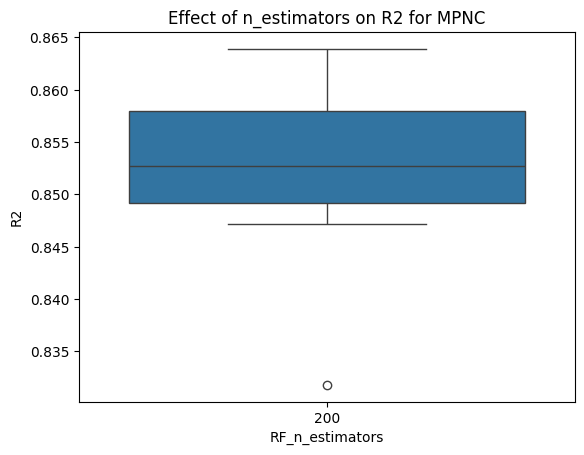

In [13]:
sns.boxplot(x="RF_n_estimators", y="R2", data=df_station)
plt.title(f"Effect of n_estimators on R2 for {station_name}")
plt.show()

In [14]:
#the best model based on R2
print(f"The best performing model for station {station_name} based on the maximum R2")
best_model_R2 = df_station.loc[df_station["R2"].idxmax()]
print(best_model_R2)

The best performing model for station MPNC based on the maximum R2
Station                                                     MPNC
Target Variable         (38.270835876464844, 15.333335876464844)
RF_max_depth                                                  15
RF_n_estimators                                              200
RF_max_features                                               40
MAE                                                     0.133801
MSE                                                     0.045795
RMSE                                                    0.213997
R2                                                      0.863907
Station_Target     MPNC_(38.270835876464844, 15.333335876464844)
Name: 36, dtype: object


In [15]:
#the best model based on MAE
print(f"The best performing model for station {station_name} based on the minimum MAE")
best_model_MAE = df_station.loc[df_station["MAE"].idxmin()]
print(best_model_MAE)

The best performing model for station MPNC based on the minimum MAE
Station                                                    MPNC
Target Variable         (38.22916793823242, 15.291667938232422)
RF_max_depth                                                 15
RF_n_estimators                                             200
RF_max_features                                              40
MAE                                                    0.090383
MSE                                                    0.022098
RMSE                                                   0.148655
R2                                                     0.831803
Station_Target     MPNC_(38.22916793823242, 15.291667938232422)
Name: 34, dtype: object


In [16]:
#the best model based on MSE
print(f"The best performing model for station {station_name} based on the minimum MSE")
best_model_MAE = df_station.loc[df_station["MSE"].idxmin()]
print(best_model_MAE)

The best performing model for station MPNC based on the minimum MSE
Station                                                    MPNC
Target Variable         (38.22916793823242, 15.291667938232422)
RF_max_depth                                                 15
RF_n_estimators                                             200
RF_max_features                                              40
MAE                                                    0.090383
MSE                                                    0.022098
RMSE                                                   0.148655
R2                                                     0.831803
Station_Target     MPNC_(38.22916793823242, 15.291667938232422)
Name: 34, dtype: object


In [17]:
#the best model based on RMSE
print(f"The best performing model for station {station_name} based on the minimum RMSE")
best_model_MAE = df_station.loc[df_station["RMSE"].idxmin()]
print(best_model_MAE)

The best performing model for station MPNC based on the minimum RMSE
Station                                                    MPNC
Target Variable         (38.22916793823242, 15.291667938232422)
RF_max_depth                                                 15
RF_n_estimators                                             200
RF_max_features                                              40
MAE                                                    0.090383
MSE                                                    0.022098
RMSE                                                   0.148655
R2                                                     0.831803
Station_Target     MPNC_(38.22916793823242, 15.291667938232422)
Name: 34, dtype: object


In [18]:
#the top 5 models based on R2
print(f"The top 5 models for station {station_name} based on the maximum R2")
df_station.nlargest(5, "R2")

The top 5 models for station MPNC based on the maximum R2


,Station,Target Variable,RF_max_depth,RF_n_estimators,RF_max_features,MAE,MSE,RMSE,R2,Station_Target
36,MPNC,"(38.270835876464844, 15.333335876464844)",15,200,40,0.133801,0.045795,0.213997,0.863907,"MPNC_(38.270835876464844, 15.333335876464844)"
37,MPNC,sea_mean,15,200,40,0.108504,0.030447,0.174491,0.860996,MPNC_sea_mean
38,MPNC,sea_median,15,200,40,0.109863,0.031386,0.177160,0.855003,MPNC_sea_median
35,MPNC,"(38.1875, 15.208335876464844)",15,200,40,0.127564,0.040159,0.200396,0.852750,"MPNC_(38.1875, 15.208335876464844)"
33,MPNC,"(38.22916793823242, 15.375)",15,200,40,0.111937,0.032502,0.180282,0.851120,"MPNC_(38.22916793823242, 15.375)"


# Visualisation of Results - All Stations

Method:
* Twice - based on R2 and MAE (to compare well with Minio et al.):
* Twice - for sea_mean and sea_median:
    * Generate a bar chart for each station's best results with data labels,
    * Place each chart on the station's location on the map,
    * Highlight the overall best performance station.

## Map of baseline results for each station and sea_mean

In [19]:
for station_name in station_list:
    #choose the models for the specific station and target variable
    df_station = df[(df["Station"] == station_name) & (df["Target Variable"] == 'sea_mean')]
    #print(df_station.head)
    
    #find the best model based on R2
    best_model_R2 = df_station.loc[df_station["R2"].idxmax()]
    
    print(best_model_R2)
    
    #get the corresponding metrics
    metrics = ["MAE", "MSE", "RMSE", "R2"]
    values = [best_model_R2[metric] for metric in metrics]
    #print(values)
    
    #plot a plain bar chart
    plt.figure(figsize=(2,2))
    plt.bar(metrics, values, color='deepskyblue')
    plt.ylim(0, max(values) + 0.15)
    
    #add data labels
    for i, v in enumerate(values):
        plt.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontsize=10)
    
    #formatting
    plt.xticks(fontsize=12,rotation=20)
    plt.yticks([], [])
    #plt.gca().set_frame_on(False) #no borders
    
    plt.title(f"{station_name}", loc='left')
    
    plt.tight_layout()
    
    plt.savefig(f"barcharts/baseline/sea_mean/{station_name}.png")
    plt.close()

Station                     AIO
Target Variable        sea_mean
RF_max_depth                 15
RF_n_estimators             200
RF_max_features              40
MAE                    0.209225
MSE                    0.089084
RMSE                   0.298469
R2                      0.35031
Station_Target     AIO_sea_mean
Name: 5, dtype: object
Station                     CSLB
Target Variable         sea_mean
RF_max_depth                  15
RF_n_estimators              200
RF_max_features               40
MAE                     0.136794
MSE                     0.044309
RMSE                    0.210498
R2                      0.868037
Station_Target     CSLB_sea_mean
Name: 13, dtype: object
Station                     HAGA
Target Variable         sea_mean
RF_max_depth                  15
RF_n_estimators              200
RF_max_features               40
MAE                     0.156431
MSE                     0.065064
RMSE                    0.255076
R2                      0.638913
Statio

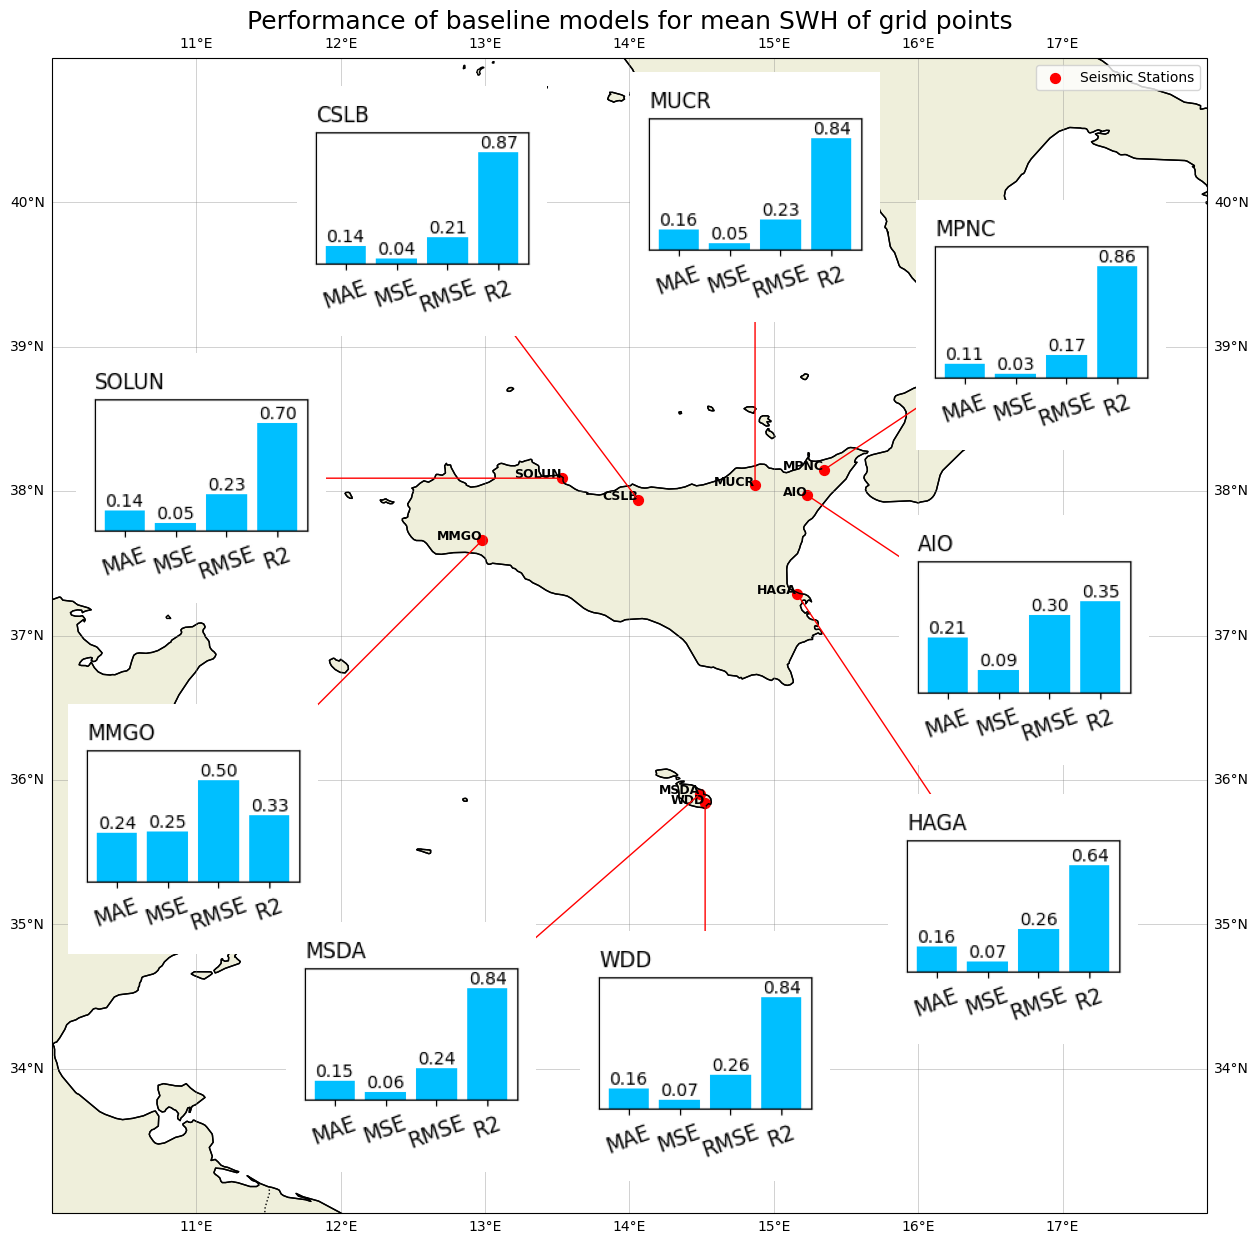

In [20]:
#create the plot
fig, ax = plt.subplots(figsize=(30, 15), subplot_kw={'projection': ccrs.PlateCarree()})

#set map extent [west, east, south, north]
ax.set_extent([10.0, 18.0, 33.0, 41.0], crs=ccrs.PlateCarree())

#add land features
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

#plot seismic stations
ax.scatter(station_lons, station_lats, color='red', marker='o', s=50, label='Seismic Stations')

#annotate station names
for name, lat, lon in zip(station_list, station_lats, station_lons):
    ax.text(lon, lat, name, fontsize=9, fontweight='bold', ha='right', transform=ccrs.PlateCarree())

#define the offset for each station
station_offsets = {
    "AIO": (1.5, -1),
    "CSLB": (-1.5, 2),
    "HAGA": (1.5, -2.25),
    "MMGO": (-2, -2),
    "MPNC": (1.5, 1),
    "MSDA": (-2, -1.75),
    "MUCR": (0, 2),
    "SOLUN": (-2.5, 0),
    "WDD": (0, -1.75)
}

#function to overlay image onto plot
def add_station_plot(ax, station_name, lon, lat):
    img_path = f"barcharts/baseline/sea_mean/{station_name}.png"
    
    img = mpimg.imread(img_path) #read the image
    imagebox = OffsetImage(img, zoom=0.9) #adjust zoom to control size and use alpha to keep transparent background

    lon_offset, lat_offset = station_offsets.get(station_name) #get the specific offset required to ensure clear visualisation on the map

    ax.annotate('', xy=(lon + lon_offset, lat + lat_offset), xytext=(lon, lat),
                arrowprops=dict(arrowstyle='->', color='red', lw=1),
                xycoords=ccrs.PlateCarree(), textcoords=ccrs.PlateCarree())
    
    ab = AnnotationBbox(imagebox, (lon + lon_offset, lat + lat_offset), frameon=False, 
                        xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), 
                        bboxprops=dict(edgecolor='black', linewidth=0.5))  
    ax.add_artist(ab)

#implement function to overlay plots
for name, lat, lon in zip(station_list, station_lats, station_lons):
    add_station_plot(ax, name, lon, lat)

#add a legend
plt.legend()

#add gridlines
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)

plt.title("Performance of baseline models for mean SWH of grid points",fontsize=18)

plt.savefig('barcharts/baseline/BASELINE_sea_mean_plot.png', bbox_inches='tight')

plt.show()

## Map of baseline results for each station and sea_median

In [21]:
for station_name in station_list:
    #choose the models for the specific station and target variable
    df_station = df[(df["Station"] == station_name) & (df["Target Variable"] == 'sea_median')]

    #find the best model based on R2
    best_model_R2 = df_station.loc[df_station["R2"].idxmax()]

    print(best_model_R2)
    
    #get the corresponding metrics
    metrics = ["MAE", "MSE", "RMSE", "R2"]
    values = [best_model_R2[metric] for metric in metrics]
    #print(values)

    #plot a plain bar chart
    plt.figure(figsize=(2,2))
    plt.bar(metrics, values, color='deepskyblue')
    
    plt.ylim(0, max(values) + 0.18)
    
    #add data labels
    for i, v in enumerate(values):
        plt.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontsize=10)
    
    #formatting
    plt.xticks(fontsize=12,rotation=20)
    plt.yticks([], [])
    plt.title(f"{station_name}", loc='left')
    #plt.gca().set_frame_on(False) #no borders
    
    plt.tight_layout()
    
    plt.savefig(f"barcharts/baseline/sea_median/{station_name}.png")
    plt.close()

Station                       AIO
Target Variable        sea_median
RF_max_depth                   15
RF_n_estimators               200
RF_max_features                40
MAE                      0.214981
MSE                      0.094981
RMSE                      0.30819
R2                       0.343725
Station_Target     AIO_sea_median
Name: 6, dtype: object
Station                       CSLB
Target Variable         sea_median
RF_max_depth                    15
RF_n_estimators                200
RF_max_features                 40
MAE                       0.138004
MSE                       0.045313
RMSE                      0.212869
R2                        0.869349
Station_Target     CSLB_sea_median
Name: 14, dtype: object
Station                       HAGA
Target Variable         sea_median
RF_max_depth                    15
RF_n_estimators                200
RF_max_features                 40
MAE                       0.157142
MSE                       0.065354
RMSE              

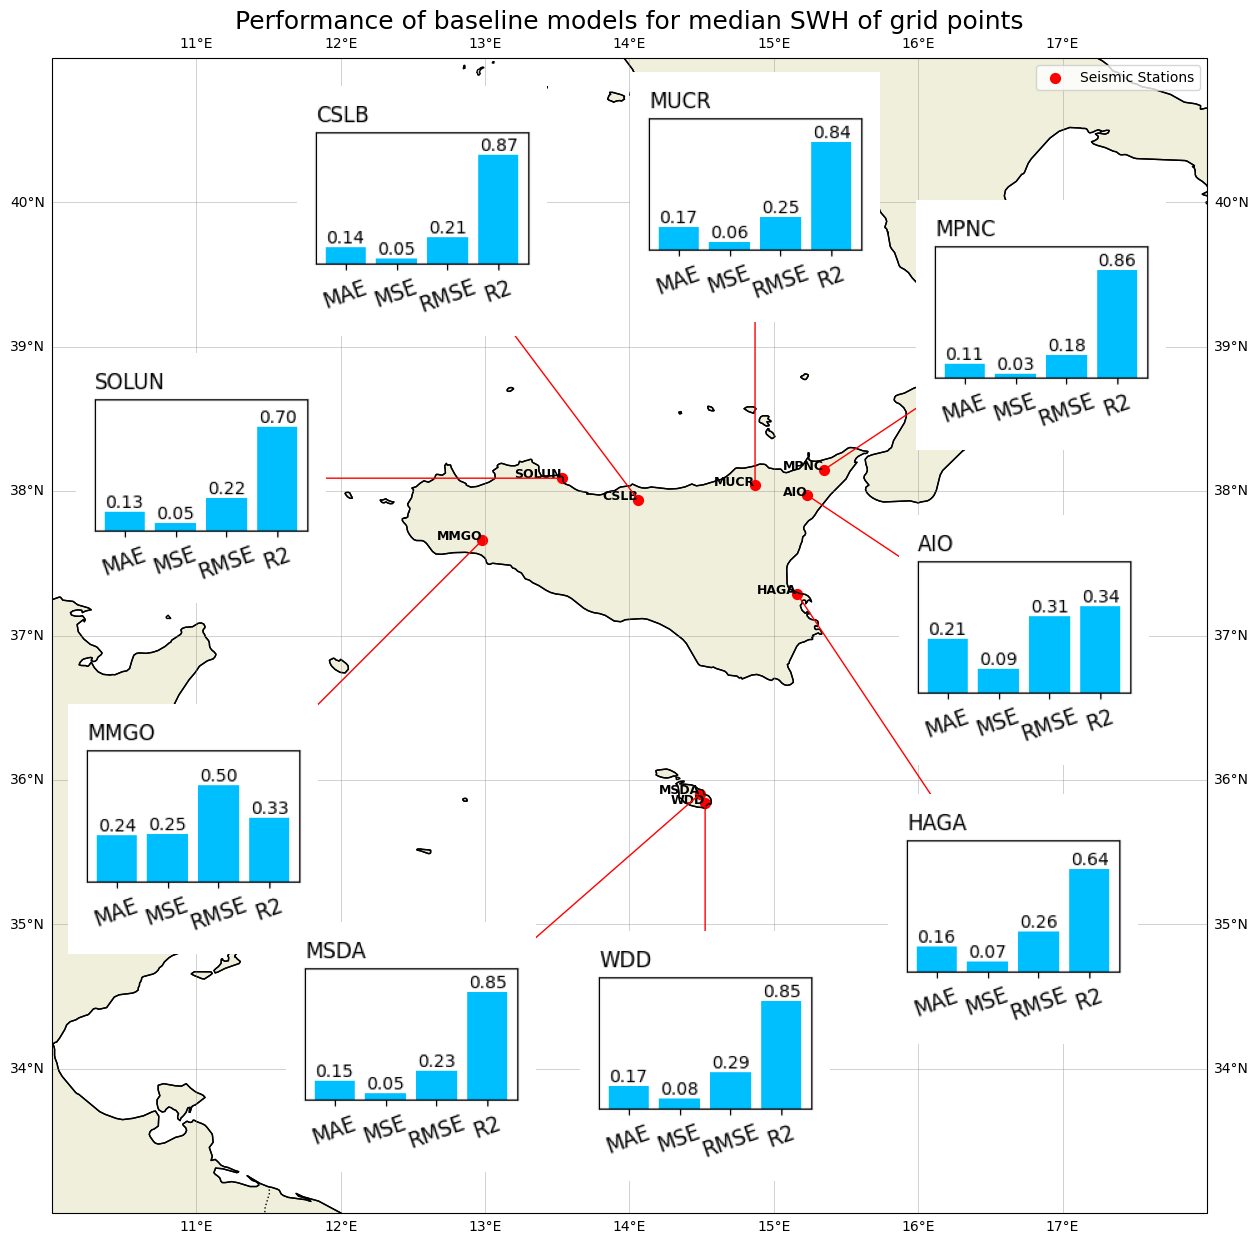

In [22]:
#create the plot
fig, ax = plt.subplots(figsize=(30, 15), subplot_kw={'projection': ccrs.PlateCarree()})

#set map extent [west, east, south, north]
ax.set_extent([10.0, 18.0, 33.0, 41.0], crs=ccrs.PlateCarree())

#add land features
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

#plot seismic stations
ax.scatter(station_lons, station_lats, color='red', marker='o', s=50, label='Seismic Stations')

#annotate station names
for name, lat, lon in zip(station_list, station_lats, station_lons):
    ax.text(lon, lat, name, fontsize=9, fontweight='bold', ha='right', transform=ccrs.PlateCarree())

#define the offset for each station
#define the offset for each station
station_offsets = {
    "AIO": (1.5, -1),
    "CSLB": (-1.5, 2),
    "HAGA": (1.5, -2.25),
    "MMGO": (-2, -2),
    "MPNC": (1.5, 1),
    "MSDA": (-2, -1.75),
    "MUCR": (0, 2),
    "SOLUN": (-2.5, 0),
    "WDD": (0, -1.75)
}

#function to overlay image onto plot
def add_station_plot(ax, station_name, lon, lat):
    img_path = f"barcharts/baseline/sea_median/{station_name}.png"
    
    img = mpimg.imread(img_path) #read the image
    imagebox = OffsetImage(img, zoom=0.9) #adjust zoom to control size and use alpha to keep transparent background

    lon_offset, lat_offset = station_offsets.get(station_name) #get the specific offset required to ensure clear visualisation on the map

    ax.annotate('', xy=(lon + lon_offset, lat + lat_offset), xytext=(lon, lat),
                arrowprops=dict(arrowstyle='->', color='red', lw=1),
                xycoords=ccrs.PlateCarree(), textcoords=ccrs.PlateCarree())
    
    ab = AnnotationBbox(imagebox, (lon + lon_offset, lat + lat_offset), frameon=False, 
                        xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), 
                        bboxprops=dict(edgecolor='black', linewidth=0.5))  
    ax.add_artist(ab)

#implement function to overlay plots
for name, lat, lon in zip(station_list, station_lats, station_lons):
    add_station_plot(ax, name, lon, lat)

#add a legend
plt.legend()

#add gridlines
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)

plt.title("Performance of baseline models for median SWH of grid points",fontsize=18)

plt.savefig('barcharts/baseline/BASELINE_sea_median_plot.png', bbox_inches='tight')

plt.show()

# Results for each grid cell vs the mean and median of grid cells

In [23]:
df["is_coord"] = ~df["Target Variable"].astype(str).str.startswith("sea_") #coordinate variables start with ( while all others start with sea_ --> sea_mean and sea_median

## R2

In [43]:
results_str = {}

results_flt = {}

for station in station_list:
    df_station = df[df["Station"] == station]
    
    #extracts the results for the grid cells, the mean and median
    grid_df = df_station[df_station["is_coord"]]
    sea_mean = df_station[df_station["Target Variable"] == "sea_mean"]
    sea_median = df_station[df_station["Target Variable"] == "sea_median"]

    grid_mean = grid_df["R2"].mean()
    grid_std = grid_df["R2"].std()
    sea_mean = sea_mean["R2"].values[0]
    sea_median = sea_median["R2"].values[0]
    
    results_str[station] = {
        #"Grid_Mean_R2": grid_df["R2"].mean(),
        #"Grid_std_R2": grid_df["R2"].std(),
        "Grid_Mean_std_R2": f"{grid_mean:.3f} ± {grid_std:.3f}",
        "Sea_Mean_R2": f"{sea_mean:.3f}",
        "Sea_Median_R2": f"{sea_median:.3f}"
    }

    results_flt[station] = {
        "Grid_Mean_R2": grid_mean,
        "Grid_std_R2": grid_std,
        "Sea_Mean_R2": sea_mean,
        "Sea_Median_R2": sea_median
    }

results_str_df = pd.DataFrame.from_dict(results_str, orient="index")
results_flt_df = pd.DataFrame.from_dict(results_flt, orient="index")
print("Table of results - report version (string):")
print(results_str_df)
results_str_df.to_csv("baseline_analysis/r2.csv")

print("\n\nTable of results - charts version (float):")
print(results_flt_df)

Table of results - report version (string):
      Grid_Mean_std_R2 Sea_Mean_R2 Sea_Median_R2
AIO      0.348 ± 0.007       0.350         0.344
CSLB     0.867 ± 0.006       0.868         0.869
HAGA     0.635 ± 0.016       0.639         0.639
MMGO     0.329 ± 0.009       0.330         0.331
MPNC     0.849 ± 0.012       0.861         0.855
MSDA     0.828 ± 0.036       0.843         0.852
MUCR     0.833 ± 0.006       0.840         0.837
SOLUN    0.693 ± 0.012       0.698         0.700
WDD      0.796 ± 0.062       0.841         0.847


Table of results - charts version (float):
       Grid_Mean_R2  Grid_std_R2  Sea_Mean_R2  Sea_Median_R2
AIO        0.347927     0.007131     0.350310       0.343725
CSLB       0.866877     0.006270     0.868037       0.869349
HAGA       0.635195     0.015566     0.638913       0.638781
MMGO       0.329389     0.008987     0.329664       0.330936
MPNC       0.849344     0.011612     0.860996       0.855003
MSDA       0.827599     0.035679     0.842874       0.8

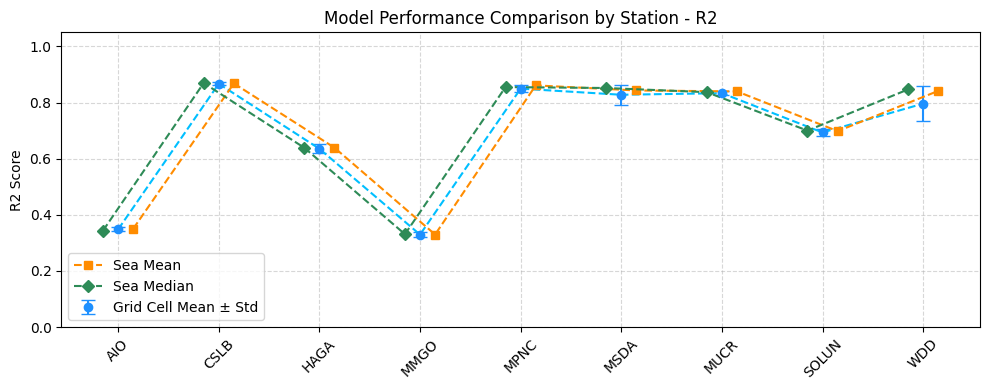

In [44]:
grid_means = results_flt_df["Grid_Mean_R2"]
grid_stds = results_flt_df["Grid_std_R2"]
sea_means = results_flt_df["Sea_Mean_R2"]
sea_medians = results_flt_df["Sea_Median_R2"]

fig, ax = plt.subplots(figsize=(10, 4))

x = np.arange(len(station_list))

#performance for grid cell with error bars
ax.errorbar(x, grid_means, yerr=grid_stds, fmt='o', capsize=5, label="Grid Cell Mean ± Std", color='dodgerblue')
#line to join the blue dots
ax.plot(x, grid_means, '--', color='deepskyblue')

#sea_mean and sea_median with a slight offset for legibility
ax.plot(x+0.15, sea_means, 's--', label="Sea Mean", color='darkorange')
ax.plot(x-0.15, sea_medians, 'D--', label="Sea Median", color='seagreen')

# Aesthetics
ax.set_ylabel("R2 Score")
ax.set_title("Model Performance Comparison by Station - R2")
ax.set_ylim(0, 1.05)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_xticks(x)
ax.set_xticklabels(station_list, rotation=45)

plt.tight_layout()
plt.show()

## MAE

In [45]:
results_str = {}

results_flt = {}

for station in station_list:
    df_station = df[df["Station"] == station]
    
    #extracts the results for the grid cells, the mean and median
    grid_df = df_station[df_station["is_coord"]]
    sea_mean = df_station[df_station["Target Variable"] == "sea_mean"]
    sea_median = df_station[df_station["Target Variable"] == "sea_median"]

    grid_mean = grid_df["MAE"].mean()
    grid_std = grid_df["MAE"].std()
    sea_mean = sea_mean["MAE"].values[0]
    sea_median = sea_median["MAE"].values[0]
    
    results_str[station] = {
        #"Grid_Mean_MAE": grid_df["MAE"].mean(),
        #"Grid_std_MAE": grid_df["MAE"].std(),
        "Grid_Mean_std_MAE": f"{grid_mean:.3f} ± {grid_std:.3f}",
        "Sea_Mean_MAE": f"{sea_mean:.3f}",
        "Sea_Median_MAE": f"{sea_median:.3f}"
    }

    results_flt[station] = {
        "Grid_Mean_MAE": grid_mean,
        "Grid_std_MAE": grid_std,
        "Sea_Mean_MAE": sea_mean,
        "Sea_Median_MAE": sea_median
    }

results_str_df = pd.DataFrame.from_dict(results_str, orient="index")
results_flt_df = pd.DataFrame.from_dict(results_flt, orient="index")
print("Table of results - report version (string):")
print(results_str_df)
results_str_df.to_csv("baseline_analysis/mae.csv")

print("\n\nTable of results - charts version (float):")
print(results_flt_df)

Table of results - report version (string):
      Grid_Mean_std_MAE Sea_Mean_MAE Sea_Median_MAE
AIO       0.210 ± 0.009        0.209          0.215
CSLB      0.137 ± 0.002        0.137          0.138
HAGA      0.158 ± 0.005        0.156          0.157
MMGO      0.244 ± 0.006        0.243          0.243
MPNC      0.113 ± 0.018        0.109          0.110
MSDA      0.159 ± 0.008        0.147          0.150
MUCR      0.159 ± 0.034        0.156          0.173
SOLUN     0.137 ± 0.015        0.135          0.130
WDD       0.183 ± 0.018        0.157          0.175


Table of results - charts version (float):
       Grid_Mean_MAE  Grid_std_MAE  Sea_Mean_MAE  Sea_Median_MAE
AIO         0.210138      0.009440      0.209225        0.214981
CSLB        0.137474      0.002287      0.136794        0.138004
HAGA        0.157903      0.004646      0.156431        0.157142
MMGO        0.244259      0.006305      0.242974        0.242777
MPNC        0.113404      0.017678      0.108504        0.109863
M

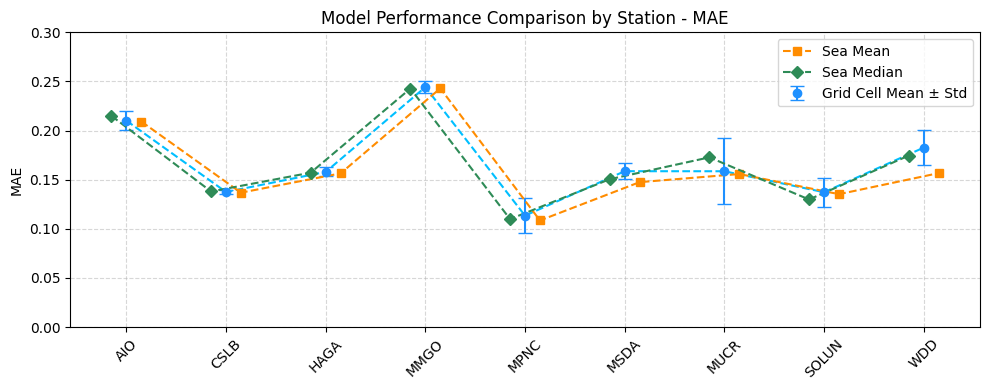

In [46]:
grid_means = results_flt_df["Grid_Mean_MAE"]
grid_stds = results_flt_df["Grid_std_MAE"]
sea_means = results_flt_df["Sea_Mean_MAE"]
sea_medians = results_flt_df["Sea_Median_MAE"]

fig, ax = plt.subplots(figsize=(10, 4))

x = np.arange(len(station_list))

#performance for grid cell with error bars
ax.errorbar(x, grid_means, yerr=grid_stds, fmt='o', capsize=5, label="Grid Cell Mean ± Std", color='dodgerblue')
#line to join the blue dots
ax.plot(x, grid_means, '--', color='deepskyblue')

#sea_mean and sea_median with a slight offset for legibility
ax.plot(x+0.15, sea_means, 's--', label="Sea Mean", color='darkorange')
ax.plot(x-0.15, sea_medians, 'D--', label="Sea Median", color='seagreen')

# Aesthetics
ax.set_ylabel("MAE")
ax.set_title("Model Performance Comparison by Station - MAE")
ax.set_ylim(0, 0.3)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_xticks(x)
ax.set_xticklabels(station_list, rotation=45)

plt.tight_layout()
plt.show()

## MSE

In [47]:
results_str = {}

results_flt = {}

for station in station_list:
    df_station = df[df["Station"] == station]
    
    #extracts the results for the grid cells, the mean and median
    grid_df = df_station[df_station["is_coord"]]
    sea_mean = df_station[df_station["Target Variable"] == "sea_mean"]
    sea_median = df_station[df_station["Target Variable"] == "sea_median"]

    grid_mean = grid_df["MSE"].mean()
    grid_std = grid_df["MSE"].std()
    sea_mean = sea_mean["MSE"].values[0]
    sea_median = sea_median["MSE"].values[0]
    
    results_str[station] = {
        #"Grid_Mean_MAE": grid_df["MAE"].mean(),
        #"Grid_std_MAE": grid_df["MAE"].std(),
        "Grid_Mean_std_MSE": f"{grid_mean:.3f} ± {grid_std:.3f}",
        "Sea_Mean_MSE": f"{sea_mean:.3f}",
        "Sea_Median_MSE": f"{sea_median:.3f}"
    }

    results_flt[station] = {
        "Grid_Mean_MSE": grid_mean,
        "Grid_std_MSE": grid_std,
        "Sea_Mean_MSE": sea_mean,
        "Sea_Median_MSE": sea_median
    }

results_str_df = pd.DataFrame.from_dict(results_str, orient="index")
results_flt_df = pd.DataFrame.from_dict(results_flt, orient="index")
print("Table of results - report version (string):")
print(results_str_df)
results_str_df.to_csv("baseline_analysis/mse.csv")

print("\n\nTable of results - charts version (float):")
print(results_flt_df)

Table of results - report version (string):
      Grid_Mean_std_MSE Sea_Mean_MSE Sea_Median_MSE
AIO       0.090 ± 0.009        0.089          0.095
CSLB      0.045 ± 0.002        0.044          0.045
HAGA      0.066 ± 0.005        0.065          0.065
MMGO      0.253 ± 0.019        0.252          0.251
MPNC      0.034 ± 0.009        0.030          0.031
MSDA      0.063 ± 0.009        0.056          0.054
MUCR      0.056 ± 0.020        0.052          0.064
SOLUN     0.056 ± 0.014        0.054          0.050
WDD       0.095 ± 0.013        0.067          0.082


Table of results - charts version (float):
       Grid_Mean_MSE  Grid_std_MSE  Sea_Mean_MSE  Sea_Median_MSE
AIO         0.090267      0.009466      0.089084        0.094981
CSLB        0.044694      0.001998      0.044309        0.045313
HAGA        0.066078      0.004756      0.065064        0.065354
MMGO        0.253037      0.019374      0.251998        0.250907
MPNC        0.033750      0.009412      0.030447        0.031386
M

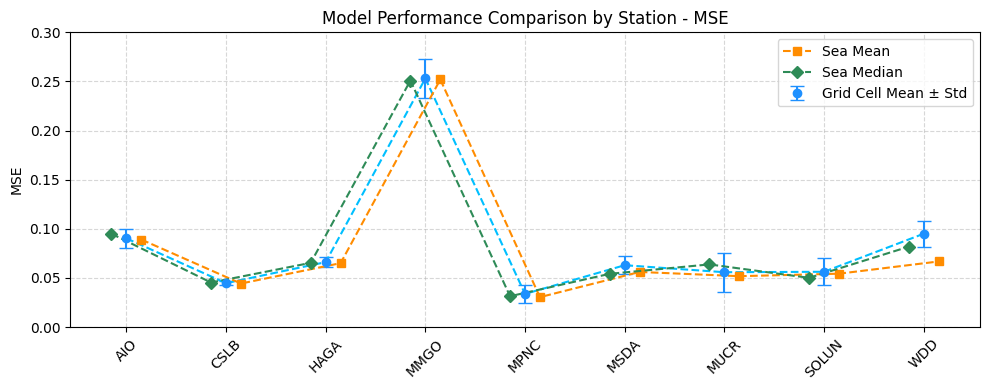

In [48]:
grid_means = results_flt_df["Grid_Mean_MSE"]
grid_stds = results_flt_df["Grid_std_MSE"]
sea_means = results_flt_df["Sea_Mean_MSE"]
sea_medians = results_flt_df["Sea_Median_MSE"]

fig, ax = plt.subplots(figsize=(10, 4))

x = np.arange(len(station_list))

#performance for grid cell with error bars
ax.errorbar(x, grid_means, yerr=grid_stds, fmt='o', capsize=5, label="Grid Cell Mean ± Std", color='dodgerblue')
#line to join the blue dots
ax.plot(x, grid_means, '--', color='deepskyblue')

#sea_mean and sea_median with a slight offset for legibility
ax.plot(x+0.15, sea_means, 's--', label="Sea Mean", color='darkorange')
ax.plot(x-0.15, sea_medians, 'D--', label="Sea Median", color='seagreen')

# Aesthetics
ax.set_ylabel("MSE")
ax.set_title("Model Performance Comparison by Station - MSE")
ax.set_ylim(0, 0.3)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_xticks(x)
ax.set_xticklabels(station_list, rotation=45)

plt.tight_layout()
plt.show()

## RMSE

In [49]:
results_str = {}

results_flt = {}

for station in station_list:
    df_station = df[df["Station"] == station]
    
    #extracts the results for the grid cells, the mean and median
    grid_df = df_station[df_station["is_coord"]]
    sea_mean = df_station[df_station["Target Variable"] == "sea_mean"]
    sea_median = df_station[df_station["Target Variable"] == "sea_median"]

    grid_mean = grid_df["RMSE"].mean()
    grid_std = grid_df["RMSE"].std()
    sea_mean = sea_mean["RMSE"].values[0]
    sea_median = sea_median["RMSE"].values[0]
    
    results_str[station] = {
        #"Grid_Mean_MAE": grid_df["MAE"].mean(),
        #"Grid_std_MAE": grid_df["MAE"].std(),
        "Grid_Mean_std_RMSE": f"{grid_mean:.3f} ± {grid_std:.3f}",
        "Sea_Mean_RMSE": f"{sea_mean:.3f}",
        "Sea_Median_RMSE": f"{sea_median:.3f}"
    }

    results_flt[station] = {
        "Grid_Mean_RMSE": grid_mean,
        "Grid_std_RMSE": grid_std,
        "Sea_Mean_RMSE": sea_mean,
        "Sea_Median_RMSE": sea_median
    }

results_str_df = pd.DataFrame.from_dict(results_str, orient="index")
results_flt_df = pd.DataFrame.from_dict(results_flt, orient="index")
print("Table of results - report version (string):")
print(results_str_df)
results_str_df.to_csv("baseline_analysis/rmse.csv", encoding='utf-8')

print("\n\nTable of results - charts version (float):")
print(results_flt_df)

Table of results - report version (string):
      Grid_Mean_std_RMSE Sea_Mean_RMSE Sea_Median_RMSE
AIO        0.300 ± 0.016         0.298           0.308
CSLB       0.211 ± 0.005         0.210           0.213
HAGA       0.257 ± 0.009         0.255           0.256
MMGO       0.503 ± 0.019         0.502           0.501
MPNC       0.182 ± 0.026         0.174           0.177
MSDA       0.250 ± 0.018         0.237           0.233
MUCR       0.232 ± 0.049         0.228           0.253
SOLUN      0.236 ± 0.028         0.233           0.224
WDD        0.308 ± 0.021         0.258           0.286


Table of results - charts version (float):
       Grid_Mean_RMSE  Grid_std_RMSE  Sea_Mean_RMSE  Sea_Median_RMSE
AIO          0.300100       0.016081       0.298469         0.308190
CSLB         0.211368       0.004768       0.210498         0.212869
HAGA         0.256924       0.009260       0.255076         0.255644
MMGO         0.502744       0.018900       0.501994         0.500906
MPNC         0.1

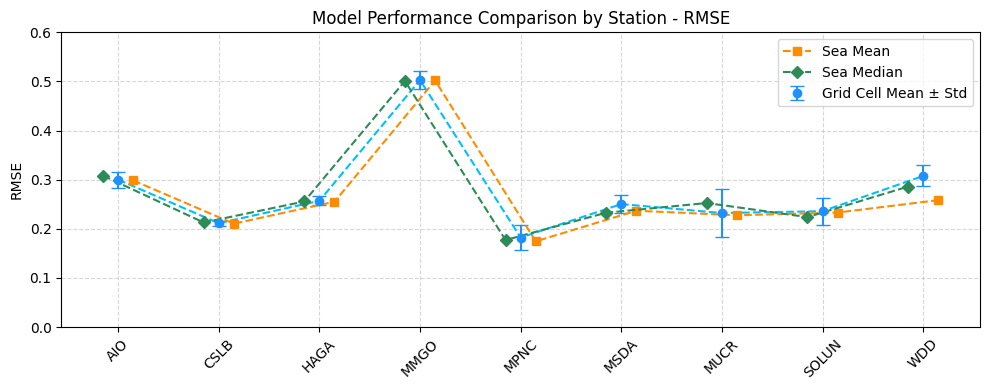

In [50]:
grid_means = results_flt_df["Grid_Mean_RMSE"]
grid_stds = results_flt_df["Grid_std_RMSE"]
sea_means = results_flt_df["Sea_Mean_RMSE"]
sea_medians = results_flt_df["Sea_Median_RMSE"]

fig, ax = plt.subplots(figsize=(10, 4))

x = np.arange(len(station_list))

#performance for grid cell with error bars
ax.errorbar(x, grid_means, yerr=grid_stds, fmt='o', capsize=5, label="Grid Cell Mean ± Std", color='dodgerblue')
#line to join the blue dots
ax.plot(x, grid_means, '--', color='deepskyblue')

#sea_mean and sea_median with a slight offset for legibility
ax.plot(x+0.15, sea_means, 's--', label="Sea Mean", color='darkorange')
ax.plot(x-0.15, sea_medians, 'D--', label="Sea Median", color='seagreen')

# Aesthetics
ax.set_ylabel("RMSE")
ax.set_title("Model Performance Comparison by Station - RMSE")
ax.set_ylim(0, 0.6)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_xticks(x)
ax.set_xticklabels(station_list, rotation=45)

plt.tight_layout()
plt.show()

# Implication of Linear Interpolation

In [57]:
rms_data = pd.read_parquet('baseline_analysis/RMS_data_BASELINE.parquet')
rms_data['index//'] = pd.to_datetime(rms_data['index//'])
rms_data.set_index('index//', inplace=True)

In [58]:
rms_data

,MMGO/Z/0.05-0.2,MMGO/Z/0.2-0.35,MMGO/Z/0.35-0.5,MMGO/Z/0.5-0.65,MMGO/Z/0.65-0.8,MMGO/Z/0.8-0.95,MMGO/Z/0.95-1.1,MMGO/Z/1.1-1.25,MMGO/Z/1.25-1.4,MMGO/Z/1.4-1.55,...,MPNC/E/0.5-0.65,MPNC/E/0.65-0.8,MPNC/E/0.8-0.95,MPNC/E/0.95-1.1,MPNC/E/1.1-1.25,MPNC/E/1.25-1.4,MPNC/E/1.4-1.55,MPNC/E/1.55-1.7,MPNC/E/1.7-1.85,MPNC/E/1.85-2.0
index//,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00+00:00,-43.506531,-70.880128,-29.008443,-38.820201,-59.501424,-82.652208,-126.927987,-214.154822,-281.697391,-294.461021,...,2.740595e-07,2.031429e-07,1.413549e-07,1.171897e-07,8.144839e-08,5.033821e-08,4.086723e-08,3.228080e-08,2.753733e-08,2.337068e-08
2018-01-01 01:00:00+00:00,-43.398788,-71.922323,-29.182204,-38.964717,-59.526136,-82.340587,-125.822762,-215.128010,-284.556523,-301.046078,...,2.740595e-07,2.031429e-07,1.413549e-07,1.171897e-07,8.144839e-08,5.033821e-08,4.086723e-08,3.228080e-08,2.753733e-08,2.337068e-08
2018-01-01 02:00:00+00:00,-44.115813,-72.836493,-29.333835,-38.992261,-59.608291,-83.113952,-126.320783,-217.493953,-289.418342,-305.928493,...,2.740595e-07,2.031429e-07,1.413549e-07,1.171897e-07,8.144839e-08,5.033821e-08,4.086723e-08,3.228080e-08,2.753733e-08,2.337068e-08
2018-01-01 03:00:00+00:00,-43.788476,-73.176846,-29.518897,-38.986936,-59.530484,-82.689032,-127.711124,-216.407319,-285.075101,-297.919817,...,2.740595e-07,2.031429e-07,1.413549e-07,1.171897e-07,8.144839e-08,5.033821e-08,4.086723e-08,3.228080e-08,2.753733e-08,2.337068e-08
2018-01-01 04:00:00+00:00,-43.534019,-73.060906,-29.731213,-38.868219,-59.501329,-82.524967,-126.557055,-208.752193,-275.773640,-290.471833,...,2.740595e-07,2.031429e-07,1.413549e-07,1.171897e-07,8.144839e-08,5.033821e-08,4.086723e-08,3.228080e-08,2.753733e-08,2.337068e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00+00:00,-56.419441,-94.566235,-33.338843,-45.652180,-74.482580,-105.712137,-168.564025,-287.765752,-383.841722,-401.480344,...,7.063585e-08,5.447155e-08,3.700990e-08,2.777059e-08,2.117257e-08,1.489249e-08,1.230706e-08,1.027056e-08,9.355019e-09,8.100082e-09
2021-12-31 20:00:00+00:00,-56.729777,-95.584781,-33.208823,-45.854523,-74.782464,-104.621028,-166.335341,-288.004487,-384.008423,-393.927998,...,6.801472e-08,5.420920e-08,3.635213e-08,2.770229e-08,2.090208e-08,1.394908e-08,1.139133e-08,9.691135e-09,8.416272e-09,6.973332e-09
2021-12-31 21:00:00+00:00,-56.792415,-95.665913,-33.234074,-45.635107,-74.209026,-104.753874,-168.772179,-292.669035,-386.386049,-392.448823,...,6.848792e-08,5.162506e-08,3.391680e-08,2.663431e-08,2.087011e-08,1.447888e-08,1.177502e-08,1.020597e-08,8.352823e-09,7.312770e-09


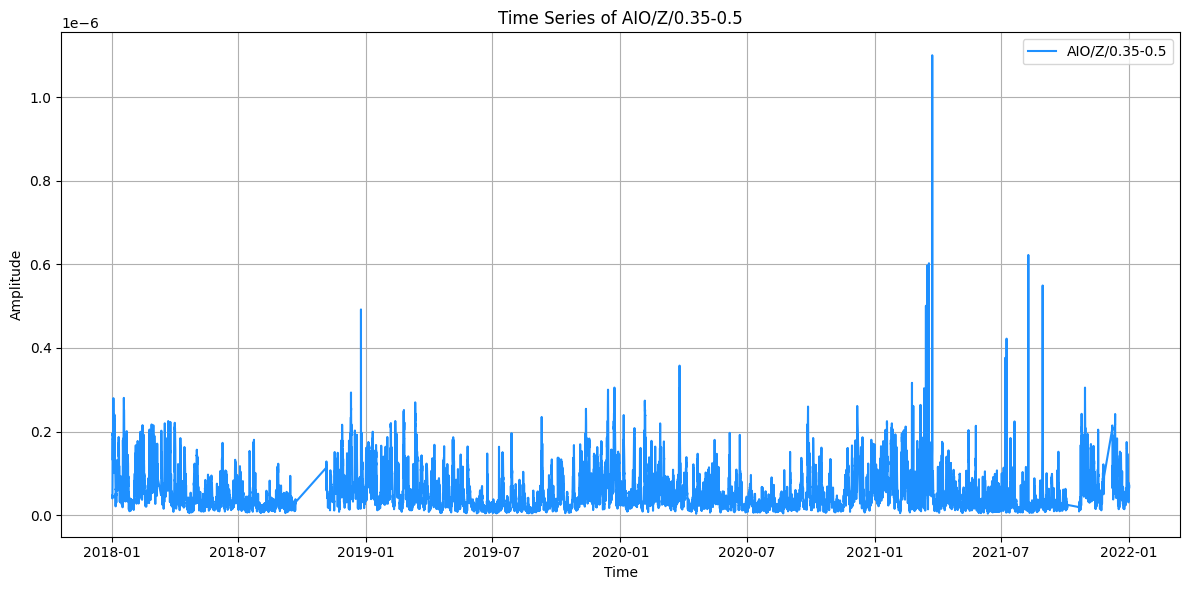

In [68]:
plt.figure(figsize=(12, 6))
plt.plot(rms_data.index, rms_data["AIO/Z/0.35-0.5"], label="AIO/Z/0.35-0.5", color='dodgerblue')

plt.title("Time Series of AIO/Z/0.35-0.5")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

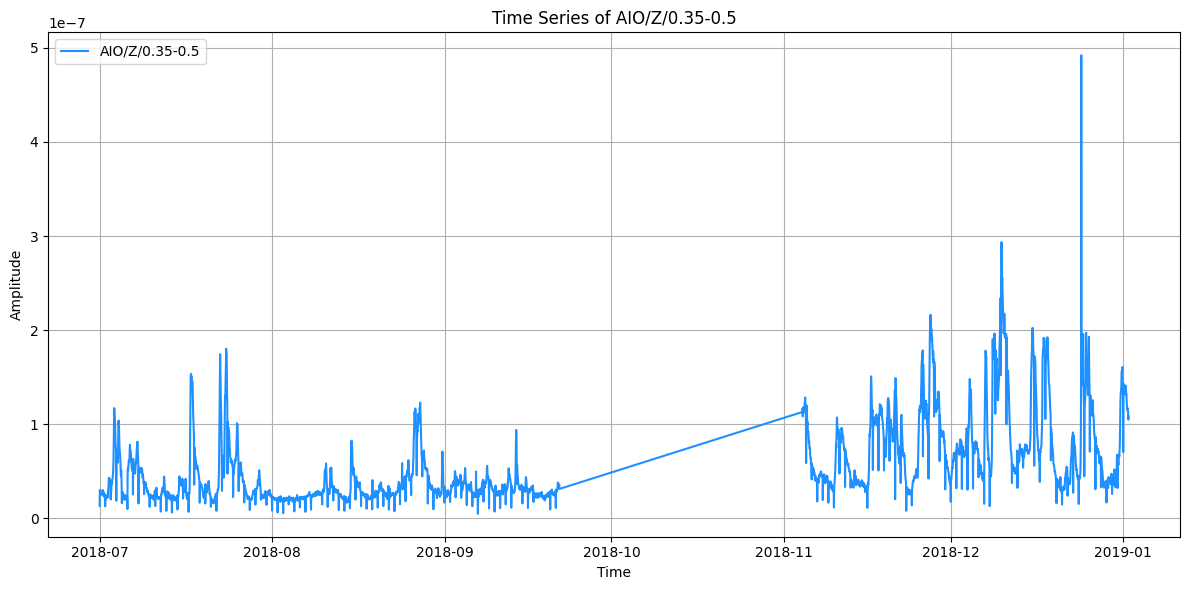

In [65]:
cropped_rms = rms_data.loc['2018-07-01':'2019-01-01']

plt.figure(figsize=(12, 6))
plt.plot(cropped_rms.index, cropped_rms["AIO/Z/0.35-0.5"], label="AIO/Z/0.35-0.5", color='dodgerblue')

plt.title("Time Series of AIO/Z/0.35-0.5")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

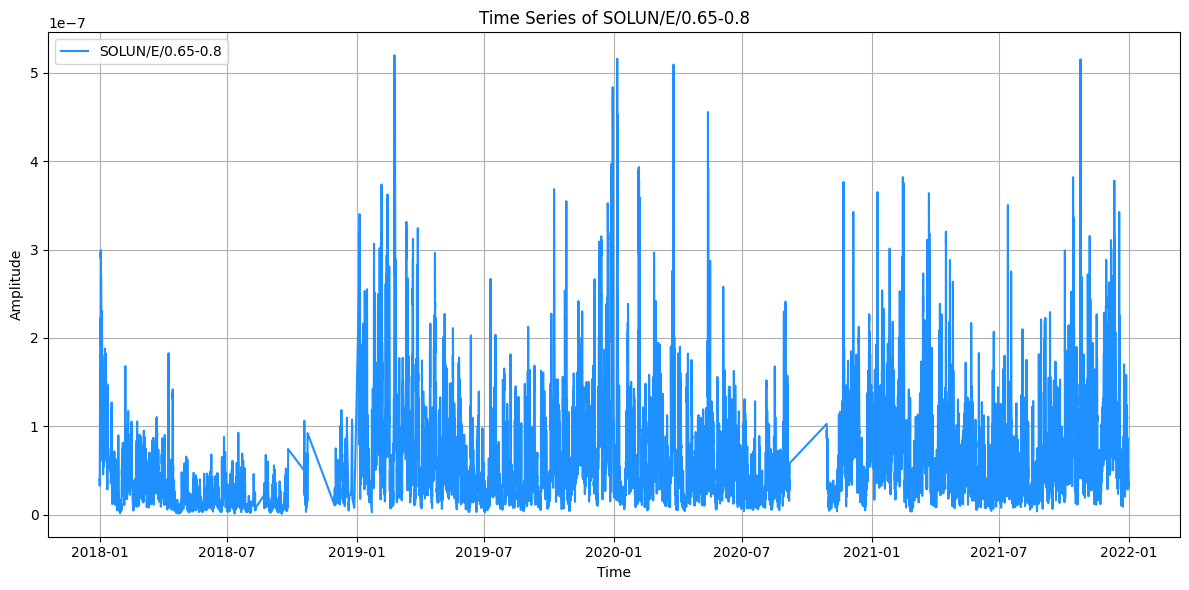

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(rms_data.index, rms_data["SOLUN/E/0.65-0.8"], label="SOLUN/E/0.65-0.8", color='dodgerblue')

plt.title("Time Series of SOLUN/E/0.65-0.8")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

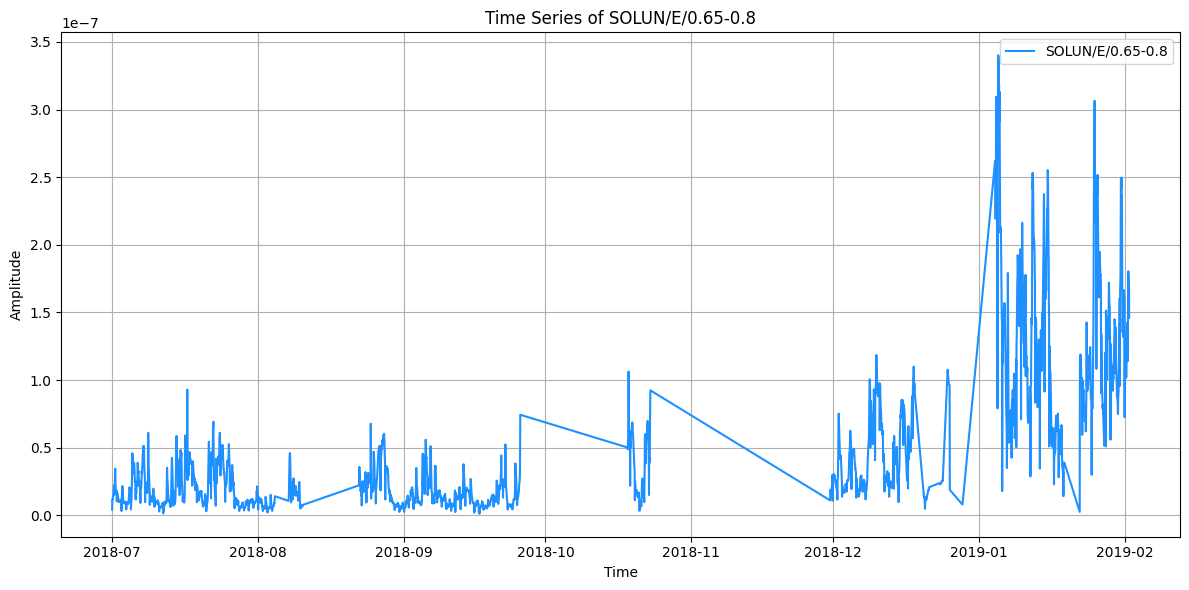

In [72]:
cropped_rms = rms_data.loc['2018-07-01':'2019-02-01']

plt.figure(figsize=(12, 6))
plt.plot(cropped_rms.index, cropped_rms["SOLUN/E/0.65-0.8"], label="SOLUN/E/0.65-0.8", color='dodgerblue')

plt.title("Time Series of SOLUN/E/0.65-0.8")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()